<a href="https://colab.research.google.com/github/omaima-9/NLP/blob/main/CNN_No_Seg_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install Dependencies and Bring in Data

In [ ]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 578.1 MB 7.8 kB/s 
     |████████████████████████████████| 578.1 MB 7.0 kB/s 
     |████████████████████████████████| 511.8 MB 28 kB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=767a4da2d5b9168e85a2f87d33c1790d56fb6975f20323f9cde666cf9b0518ab
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
# Load train
df = pd.read_csv('LabeledDataset.csv')

df=df[['commentText','Label']]
df


,commentText,Label
0,شمس مثقفة و جميلة وايد ... و احلام ههههععع ما ...,P
1,احلام اني حبيتها اكثر لان انظلمت كثير من النا...,N
2,كبرلفك والله دايضحكون عليج,N
3,والله كلامه صحيح عن شمس,N
4,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...,N
...,...,...
15045,مغروره تاليتج ياكلج الدود,P
15046,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...,P
15047,NaN,P
15048,كنت بحبا بس المقطع رقم 2 خلاها قزرة,P


# 1. Preprocess

In [ ]:
!pip list
!git clone https://github.com/aub-mind/arabert


In [ ]:
from tensorflow.keras.layers import TextVectorization
import re
!pip install pyarabic
!pip install farasapy
from arabert.preprocess import ArabertPreprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# model_name = "aubmindlab/bert-base-arabertv2"
# arabert_prep = ArabertPreprocessor( model_name=model_name,
#                                     remove_html_markup = False,
#                                     replace_urls_emails_mentions = False,
#                                     strip_tashkeel = True,
#                                     strip_tatweel = True,
#                                     insert_white_spaces = False,
#                                     remove_non_digit_repetition = False,
#                                     replace_slash_with_dash = None,
#                                     map_hindi_numbers_to_arabic = True,
#                                     apply_farasa_segmentation = None)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0010FFFF"  # wider range
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
def Pre_processing(comment):

  pat1 = '@[^ ]+' # Remove mentions
  pat2 = '#'      #
  pat3 = '[0-9]'  #remove Number
  pat4 = '[A-Za-z]' #remove english charctares
  combined_pat = '|'.join((pat1, pat2, pat3, pat4))
  comment = re.sub(combined_pat, '', comment)
  comment = re.sub('[ى]', 'ي', comment)
  comment = re.sub('[إأٱآا]', 'ا', comment)
  comment = re.sub('[ؤئ]', 'ء', comment)
  comment = re.sub('[ة]', 'ه', comment)
  comment = re.sub('[\n]', ' ', comment)
  comment = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), '', comment)  # remove punctuation
  comment=re.sub(r'(.)\1+', r'\1', comment) # remove repeated char like هههه  


  comment=remove_emoji(comment)

  # comment=arabert_prep.preprocess(comment)

  return comment

In [ ]:
clean_df=df.copy()
for i in range(len(clean_df)):
  try:
    commentText=df['commentText'][i]
    commentText=Pre_processing(commentText)
    clean_df['commentText'][i]=commentText
  except:
    commentText

In [ ]:
clean_df

,commentText,Label
0,شمس مثقفة و جميلة وايد ... و احلام ههههععع ما ...,P
1,احلام اني حبيتها اكثر لان انظلمت كثير من النا...,N
2,كبرلفك والله دايضحكون عليج,N
3,والله كلامه صحيح عن شمس,N
4,ذكرى ما نسيناك وما حد بينسينا صوتك الجميل وطيب...,N
...,...,...
15045,مغروره تاليتج ياكلج الدود,P
15046,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...,P
15047,NaN,P
15048,كنت بحبا بس المقطع رقم 2 خلاها قزرة,P


In [ ]:

clean_df= clean_df.dropna()
clean_df=clean_df.drop_duplicates()
clean_df


,commentText,Label
0,شمس مثقفه و جميله وايد و احلام هع ما اقول,P
1,احلام اني حبيتها اكثر لان انظلمت كثير من الناس...,N
2,كبرلفك واله دايضحكون عليج,N
3,واله كلامه صحيح عن شمس,N
4,ذكري ما نسيناك وما حد بينسينا صوتك الجميل وطيب...,N
...,...,...
15044,ماذا نتظر من واحده مسيحيه عاهره لك تفو علي هيك...,P
15045,مغروره تاليتج ياكلج الدود,P
15046,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...,P
15048,كنت بحبا بس المقطع رقم خلاها قزره,P


In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(clean_df['Label'])
clean_df['Label'] = encoder.transform(clean_df['Label'])
clean_df

,commentText,Label
0,شمس مثقفه و جميله وايد و احلام هع ما اقول,1
1,احلام اني حبيتها اكثر لان انظلمت كثير من الناس...,0
2,كبرلفك واله دايضحكون عليج,0
3,واله كلامه صحيح عن شمس,0
4,ذكري ما نسيناك وما حد بينسينا صوتك الجميل وطيب...,0
...,...,...
15044,ماذا نتظر من واحده مسيحيه عاهره لك تفو علي هيك...,1
15045,مغروره تاليتج ياكلج الدود,1
15046,معقول رامز الكلب يعمل هالمقلب بسيرين هذا الاعد...,1
15048,كنت بحبا بس المقطع رقم خلاها قزره,1


In [ ]:
X = clean_df['commentText'].values
y = clean_df['Label'].values

In [ ]:
X[0]

'شمس مثقفه و جميله وايد و احلام هع ما اقول'

In [ ]:
len(X[0])


41

In [ ]:
!pip install transformers
from transformers import AutoTokenizer, AutoModel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 5.0 MB/s 
     |████████████████████████████████| 182 kB 69.4 MB/s 
     |████████████████████████████████| 7.6 MB 39.4 MB/s 


In [ ]:
tokenizer = AutoTokenizer.from_pretrained( "aubmindlab/bert-base-arabertv2")

Downloading:   0%|          | 0.00/611 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/384 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/720k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from tensorflow.python.ops import tensor_array_ops
# inputs is a dictionary containing inputs_ids, attention_masks and token_type_ids as pytorch tensors
# clean_df['toke']
# for sentence in clean_df.commentText:
#   inputs= tokenizer.encode_plus(str(sentence), return_tensors='pt')
#   clean_df['toke'][sentence]=inputs['input_ids'][0]
toke=[]
for sentence in X:
  m=np.zeros(800)
  inputs= np.array(tokenizer(str(sentence), padding=True,
                    return_tensors='pt',truncation=False, max_length=800)['input_ids'][0] )
  m[:inputs.shape[0]-2]=inputs[1:-1]
  toke.append(m.astype(int))
# tokenized=(tokenizer.encode_plus(str(sentence), return_tensors='pt')['input_ids'][0] for sentence in clean_df.commentText)


/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2354: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2354: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


In [ ]:
tokenized_text = tf.convert_to_tensor(toke)

In [ ]:
len(tokenized_text)

10913

In [ ]:
MAX_FEATURES = 200000 # number of words in the vocab

In [ ]:
type(X)

numpy.ndarray

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((tokenized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(16000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
dataset.snapshot

<bound method DatasetV2.snapshot of <PrefetchDataset element_spec=(TensorSpec(shape=(None, 800), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>>

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 800), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# 2. Create Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding, Conv1D

In [ ]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 200))

# Bidirectional LSTM Layer
model.add(Conv1D(128,5,activation='relu'))
model.add(Bidirectional(LSTM(32, activation='tanh')))
# model.add(GlobalMaxPooling1D())

# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         40000200  
                                                                 
 conv1d (Conv1D)             (None, None, 128)         128128    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               41216     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                        

In [ ]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
478/478 [==============================] - 619s 1s/step - loss: 0.5254 - accuracy: 0.7369 - val_loss: 0.3286 - val_accuracy: 0.8920
Epoch 2/5
478/478 [==============================] - 598s 1s/step - loss: 0.3183 - accuracy: 0.8709 - val_loss: 0.2201 - val_accuracy: 0.9256
Epoch 3/5
478/478 [==============================] - 603s 1s/step - loss: 0.2045 - accuracy: 0.9242 - val_loss: 0.1204 - val_accuracy: 0.9550
Epoch 4/5
478/478 [==============================] - 605s 1s/step - loss: 0.1260 - accuracy: 0.9538 - val_loss: 0.0664 - val_accuracy: 0.9761
Epoch 5/5
478/478 [==============================] - 610s 1s/step - loss: 0.0784 - accuracy: 0.9753 - val_loss: 0.0452 - val_accuracy: 0.9853


In [ ]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

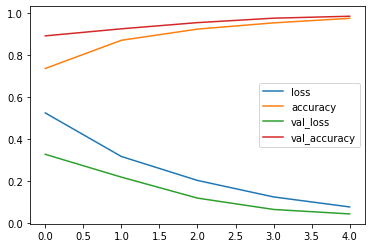

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [ ]:
input_text = vectorizer('شكلها زي الحيوان')
# input_text

In [ ]:
res = model.predict(np.array([input_text]))

1/1 [==============================] - 1s 906ms/step


In [ ]:
(np.rint(res)).astype(int)

array([[0]])

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
len(batch_X)

16

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

In [ ]:
res

array([[0.2216914]], dtype=float32)

# 4. Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
from sklearn.metrics import f1_score
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()


In [ ]:
t=[]
p=[]
for batch in test.as_numpy_iterator(): 

    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat =(np.rint(model.predict(X_true))).astype(int)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    t=np.concatenate((t,y_true), axis=None)
    p=np.concatenate((p,yhat), axis=None)

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()},F1_score:{f1_score(t,p)}')

Precision: 0.9892703890800476, Recall:0.9892703890800476, Accuracy:0.970588207244873,F1_score:0.9892703862660944


# 5. Test and Gradio

In [ ]:
!pip install gradio jinja2

In [ ]:
import tensorflow as tf
import gradio as gr

In [ ]:
model.save('toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
input_str = vectorizer('انت حيوان')

In [ ]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 135ms/step


In [ ]:
res

array([[0.11611608]], dtype=float32)

In [ ]:
clean_df.columns[1:]

Index(['Label'], dtype='object')

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    text = '{}: {}'.format("Label",(np.rint(results)).astype(int))
    
    return text

In [ ]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://83d3fba6555a1ccd.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
